<a href="https://colab.research.google.com/github/aksharpatel47/deep-learning-ai-tf-2.0-py-swift/blob/master/intro_to_tensorflow_ai_ml_dl/week2/week2_tf2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q tensorflow-gpu==2.0.0-alpha0

In [0]:
import tensorflow as tf
from tensorflow import keras as kr
import matplotlib.pyplot as plt

In [69]:
print(tf.__version__)

2.0.0-alpha0


## Fashion MNIST, A Computer Vision Example

In [0]:
mnist = kr.datasets.fashion_mnist

In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

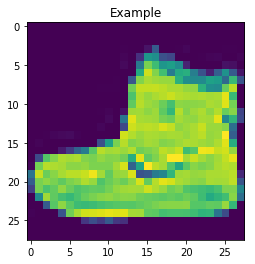

In [72]:
plt.title("Example")
plt.imshow(training_images[0])

In [0]:
training_images = training_images / 255.0
test_images = test_images / 255.0

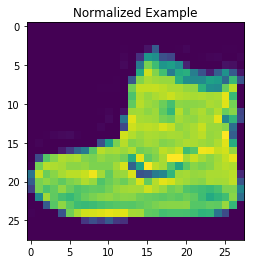

In [74]:
plt.title("Normalized Example")
plt.imshow(training_images[0])

### Creating the model

In [0]:
class myCallback(kr.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('loss') < 0.4):
      print("\nReached 60% accuracy so ending the training.")
      self.model.stop_training = True

In [0]:
model = kr.models.Sequential([
    kr.layers.Flatten(),
#     kr.layers.Dense(128, activation=tf.nn.relu),
    kr.layers.Dense(512, activation=tf.nn.relu),
#     kr.layers.Dense(1024, activation=tf.nn.relu),
    kr.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=5, callbacks=[myCallback()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4725 - accuracy: 0.8317 - val_loss: 0.4210 - val_accuracy: 0.8492
Epoch 2/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.3584 - accuracy: 0.8691
Reached 60% accuracy so ending the training.
60000/60000 [==============================] - 6s 94us/sample - loss: 0.3583 - accuracy: 0.8691 - val_loss: 0.3697 - val_accuracy: 0.8678


In [86]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.3697 - accuracy: 0.8678


[0.36972635397911074, 0.8678]

In [0]:
classifications = model.predict(test_images)

In [88]:
classifications[0]

array([1.5208898e-04, 4.5707870e-07, 4.1109146e-05, 1.3858183e-05,
       3.5020217e-05, 7.6241449e-02, 4.3629986e-04, 2.3297589e-01,
       5.1444173e-03, 6.8495947e-01], dtype=float32)

In [89]:
print(test_labels[0])

9


## Handwriting Recognition

In [0]:
mnist = kr.datasets.mnist

In [91]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
class StopCallback(kr.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.99:
      print("\nRequired Accuracy Achieved")
      self.model.stop_training=True

In [0]:
model = kr.models.Sequential([
    kr.layers.Flatten(),
    kr.layers.Dense(512, activation=tf.nn.relu),
    kr.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[StopCallback()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2001 - accuracy: 0.9418 - val_loss: 0.1014 - val_accuracy: 0.9683
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0809 - accuracy: 0.9750 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 3/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0725 - val_accuracy: 0.9769
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0756 - val_accuracy: 0.9784
Epoch 5/10
59424/60000 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9908
Required Accuracy Achieved
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.0861 - val_accuracy: 0.9766
